# k-means のテスト

1. データをインポート
2. pandas.plotのチュートリアル
3. seabornのチュートリアル

データセットの数: 1375, 特徴量の次元: 100


/usr/local/lib/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['meiryo'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


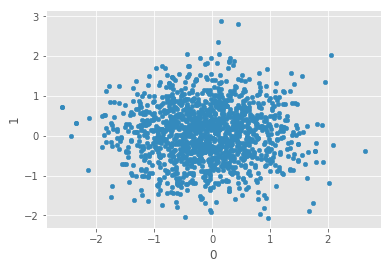

In [2]:
%matplotlib inline

import pickle
import numpy as np
from sklearn.cluster import KMeans
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

plt.style.use('ggplot') 
font = {'family' : 'meiryo'}
matplotlib.rc('font', **font)

pkl_file = 'result_0209_C024/vector.pkl'
art_file = 'data_utanet/test_a.txt'
len_file = 'data_utanet/test_cnt.txt'

# pkl file の情報
with open(pkl_file, 'rb') as f:
    vectors = pickle.load(f)

print('データセットの数: {}, 特徴量の次元: {}'.\
      format(vectors.shape[0], vectors.shape[1]))

#cov = np.cov(vectors, rowvar=False)
#print(cov)


# artist file の情報
with open(art_file, 'r') as f:
    arts = [line.strip()
                 for line in f.readlines()[:vectors.shape[0]]]    
#print('アーティストの数: {}'.format(len(set(arts))))

# length file の情報
with open(len_file, 'r') as f:
    lens = [int(line.strip())
                 for line in f.readlines()[:vectors.shape[0]]]    

assert len(vectors) == len(arts) == len(lens)

# pandasで散布図
df_vec = pd.DataFrame(vectors)
df_vec.plot.scatter(x=0, y=1) # 軸を指定できる(key,index)


/usr/local/lib/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['meiryo'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


91
85
78
74
72
70
62
62
58
57
55
53
52
51
50
49
48
40
39
38
37
35
26
23
16
15
14
12
10
3


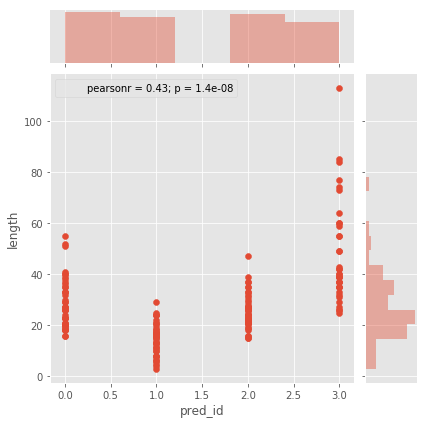

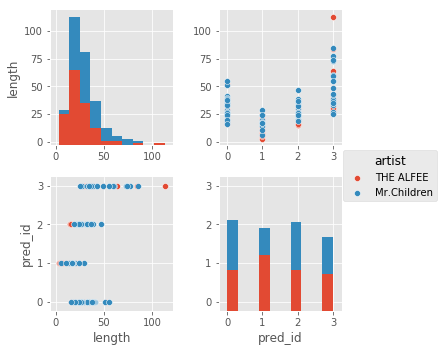

In [11]:
n_clusters = 4

pred = KMeans(n_clusters=n_clusters).fit_predict(vectors)

df = pd.DataFrame({'artist': arts,
                   'length': lens,
                   'pred_id': pred,
                  })

# Mr.Children, THE ALFEE
df_2 = df[(df['artist']=='Mr.Children') |
          (df['artist']=='THE ALFEE')]
#print(df_2)

# Seaborn で散布図
sns.jointplot(x='pred_id', y='length',data=df_2)

# seabornで散布図行列
sns.pairplot(df_2, hue='artist') #, diag_kind='kde')


#print(df['pred_id'].value_counts())
#df['length'].value_counts()

for i in df['artist'].value_counts():
    print(i)


# for i in range(4):
#     mean_id = df[df['pred_id']==i].mean()
#     print(mean_id)

# clusterinfo = pd.DataFrame()
# for i in range(n_clusters):
#     clusterinfo['cluster_' + str(i)] = df[df['pred_id']==i]['artist'].value_counts()    
# my_plot = clusterinfo.T.plot(kind='bar', stacked=True, title="Mean Value of 4 Clusters")
# my_plot.set_xticklabels(my_plot.xaxis.get_majorticklabels(), rotation=0)